In [ ]:
       from tensorflow.keras.models import Sequential
       from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
       from tensorflow.keras.optimizers import Adam
       from keras.preprocessing.image import ImageDataGenerator
       import numpy as np
       import matplotlib.pyplot as plt

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='rickyrams'
os.environ['KAGGLE_KEY']='76940e0039199ff1871b43bbd2a289a4'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 96% 200M/207M [00:02<00:00, 57.3MB/s]
100% 207M/207M [00:02<00:00, 82.7MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1110.jpg', '1488.jpg', '0638.jpg', '1513.jpg', '0372.jpg', '0976.jpg', '1173.jpg', '0763.jpg', '1635.jpg', '0779.jpg']
['136.jpg', '135.jpg', '20.jpg', '84.jpg', '295.jpg', '174.jpg', '26.jpg', '67.jpg', '311.jpg', '153.jpg']


['/content/New Masks Dataset/Train/Mask/1110.jpg', '/content/New Masks Dataset/Train/Mask/1488.jpg', '/content/New Masks Dataset/Train/Mask/0638.jpg', '/content/New Masks Dataset/Train/Mask/1513.jpg', '/content/New Masks Dataset/Train/Mask/0372.jpg', '/content/New Masks Dataset/Train/Mask/0976.jpg', '/content/New Masks Dataset/Train/Mask/1173.jpg', '/content/New Masks Dataset/Train/Mask/0763.jpg']
['/content/New Masks Dataset/Train/Non Mask/136.jpg', '/content/New Masks Dataset/Train/Non Mask/135.jpg', '/content/New Masks Dataset/Train/Non Mask/20.jpg', '/content/New Masks Dataset/Train/Non Mask/84.jpg', '/content/New Masks Dataset/Train/Non Mask/295.jpg', '/content/New Masks Dataset/Train/Non Mask/174.jpg', '/content/New Masks Dataset/Train/Non Mask/26.jpg', '/content/New Masks Dataset/Train/Non Mask/67.jpg']


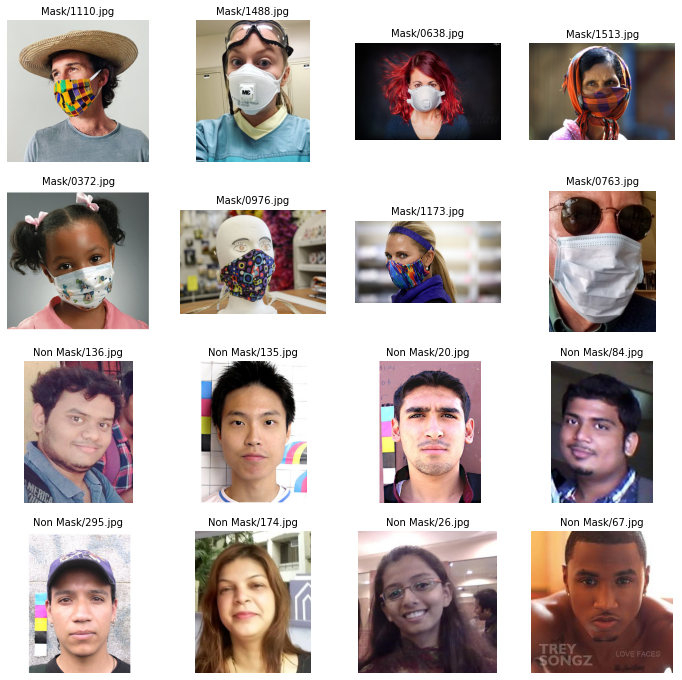

In [ ]:
import matplotlib.image as mpimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list=mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

test_generator=test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

valid_generator=validation_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu',))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=30,validation_data=valid_generator)

Epoch 1/30
19/19 [==============================] - 19s 658ms/step - loss: 4.1377 - accuracy: 0.5057 - val_loss: 0.6916 - val_accuracy: 0.6050
Epoch 2/30
19/19 [==============================] - 12s 633ms/step - loss: 0.6249 - accuracy: 0.6509 - val_loss: 0.4338 - val_accuracy: 0.8683
Epoch 3/30
19/19 [==============================] - 12s 648ms/step - loss: 0.3524 - accuracy: 0.8582 - val_loss: 0.3671 - val_accuracy: 0.8933
Epoch 4/30
19/19 [==============================] - 12s 641ms/step - loss: 0.3077 - accuracy: 0.8821 - val_loss: 0.3311 - val_accuracy: 0.9033
Epoch 5/30
19/19 [==============================] - 12s 634ms/step - loss: 0.2634 - accuracy: 0.9076 - val_loss: 0.2313 - val_accuracy: 0.9200
Epoch 6/30
19/19 [==============================] - 12s 640ms/step - loss: 0.2523 - accuracy: 0.9164 - val_loss: 0.2520 - val_accuracy: 0.9233
Epoch 7/30
19/19 [==============================] - 12s 650ms/step - loss: 0.2368 - accuracy: 0.9102 - val_loss: 0.2131 - val_accuracy: 0.9350

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

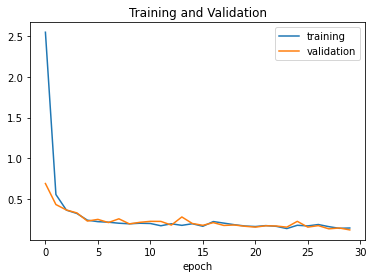

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

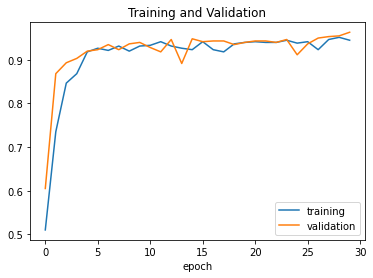

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation')
plt.xlabel('epoch')

In [ ]:
test_loss,test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 292ms/step - loss: 0.1782 - accuracy: 0.9100
test loss:0.17820878326892853 test acc:0.9100000262260437


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(fname)
  if prediction==0:
    print('Mask')
  else :
     print('No Mask') 

Saving m.jfif to m.jfif
Saving nm.jfif to nm.jfif
m.jfif
No Mask
nm.jfif
No Mask


In [ ]:
model.save('model.h5')